In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import cv2

In [3]:
with open('archive/A_Z Handwritten Data.csv', 'r') as csv_file:
    result = csv.reader(csv_file)
    rows = []
    for row in result:
        rows.append(row)

print(rows[100000])
print(np.shape(rows[100000]))

# each row is a flatted 28x28 image
# the first element is the representative for class that image belongs to. Eg: A is class 0, B is class 1, etc. => that's why 28x28+1 = 785

['11', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '95', '155', '150', '67', '11', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '208', '255', '255', '218', '68', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '208', '255', '255', '226', '71', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'

In [8]:
print(np.shape(rows))
# a dataset has 372451 lists of elements, each has 785 elements that were presented above

(372451, 785)


['2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '60', '162', '255', '255', '255', '255', '255', '255', '224', '100', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '46', '77', '233', '255', '255', '255', '236', '246', '255', '255', '255', '255', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '255', '255', '255', '255', '255', '167', '65', '116', '25

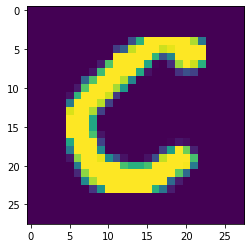

In [4]:
letter = rows[30000]
x = np.array([int(j) for j in letter[1:]])
x = x.reshape(28, 28)

print(letter)
plt.imshow(x)

In [9]:
# Build simple model for the first 4 letters
# Take data for the first 4 letters
train_data = []
train_label = []
for letter in rows:
    if (letter[0] == '0') or (letter[0] == '1') or (letter[0] == '2') or (letter[0] == '3'):
        x = np.array([int(j) for j in letter[1:]])
        x = x.reshape(28, 28)
        train_data.append(x)
        train_label.append(int(letter[0]))
    else:
        break

In [15]:
print(len(train_label))
print(np.shape(train_data))

56081
(56081, 28, 28)


In [16]:
# shuffle the data
import random

shuffle_order = list(range(56081))
random.shuffle(shuffle_order)

train_data = np.array(train_data)
train_label = np.array(train_label)

train_data = train_data[shuffle_order]
train_label = train_label[shuffle_order]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_test[0].shape)

In [25]:
import pandas as pd

In [28]:
import tensorflow as tf
from keras import backend
from keras import models, layers, optimizers, losses

BATCH_SIZE = 32
IMG_SIZE = 28
N_CLASSES = 4
LR = 0.001
N_EPOCHS = 10

backend.clear_session()

np.random.seed(42)
tf.random.set_seed(42)

model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(layers.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.Dropout(0.8))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(N_CLASSES, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                        

Epoch 1/10


2022-05-09 23:09:51.369921: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172348288 exceeds 10% of free system memory.


  1/859 [..............................] - ETA: 24:27 - loss: 24.4471 - accuracy: 0.2500

2022-05-09 23:09:53.110609: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18063360 exceeds 10% of free system memory.
2022-05-09 23:09:53.114610: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18063360 exceeds 10% of free system memory.
2022-05-09 23:09:53.145032: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17160192 exceeds 10% of free system memory.


859/859 [==============================] - 148s 171ms/step - loss: 0.4106 - accuracy: 0.9547 - val_loss: 0.0502 - val_accuracy: 0.9880
Epoch 2/10
859/859 [==============================] - 148s 173ms/step - loss: 0.0564 - accuracy: 0.9842 - val_loss: 0.0313 - val_accuracy: 0.9929
Epoch 3/10
859/859 [==============================] - 149s 173ms/step - loss: 0.0418 - accuracy: 0.9877 - val_loss: 0.0241 - val_accuracy: 0.9947
Epoch 4/10
859/859 [==============================] - 149s 174ms/step - loss: 0.0356 - accuracy: 0.9897 - val_loss: 0.0305 - val_accuracy: 0.9947
Epoch 5/10
859/859 [==============================] - 150s 174ms/step - loss: 0.0322 - accuracy: 0.9909 - val_loss: 0.0181 - val_accuracy: 0.9958
Epoch 6/10
859/859 [==============================] - 145s 169ms/step - loss: 0.0367 - accuracy: 0.9903 - val_loss: 0.0195 - val_accuracy: 0.9955
Epoch 7/10
859/859 [==============================] - 151s 176ms/step - loss: 0.0335 - accuracy: 0.9915 - val_loss: 0.0226 - val_accura

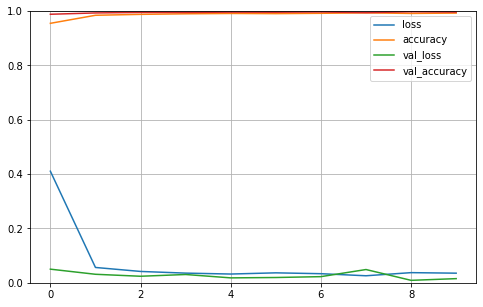

In [29]:
history = model.fit(X_train, y_train, epochs=N_EPOCHS, validation_data=(X_val, y_val), batch_size=BATCH_SIZE)

# Once the training is complete, plot the loss and accuracy metrics of the model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
model.evaluate(X_test, y_test)

526/526 [==============================] - 14s 26ms/step - loss: 0.0135 - accuracy: 0.9963


[0.013524673879146576, 0.9962555766105652]

In [31]:
model.save('./letter_recognition_model.h5')

In [33]:
load_model = models.load_model('./letter_recognition_model.h5')
test_logits = model.predict(X_test)
test_logits = np.argmax(test_logits, axis=-1)

In [34]:
print(np.sum(test_logits == y_test) / len(test_logits))

0.9962555720653788
